In [70]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.transpiler import CouplingMap
from qiskit.converters import circuit_to_dag, dag_to_circuit
from qiskit.visualization.gate_map import plot_gate_map, plot_coupling_map, plot_circuit_layout
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
%matplotlib inline

# Transpiling circuits with control flow

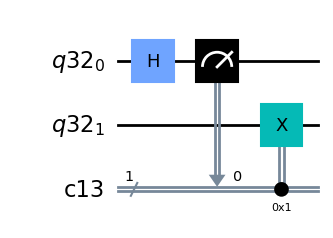

In [35]:
# OpenQASM 2.0 control flow
qr, cr = QuantumRegister(2), ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)
qc.h(0)
qc.measure(0, 0)
qc.x(1).c_if(cr, 1)
qc.draw()

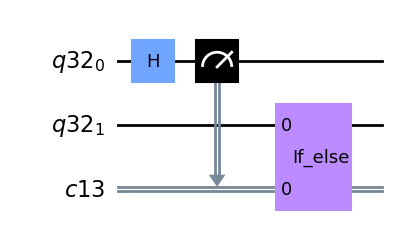

In [36]:
# `if` statement
qc = QuantumCircuit(qr, cr)
qc.h(0)
qc.measure(0, 0)
with qc.if_test((cr[0], 0)):
    qc.x(1)
qc.draw()

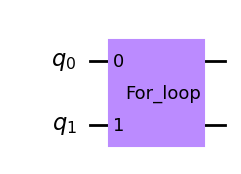

In [65]:
qc = QuantumCircuit(2)
with qc.for_loop(range(3)) as i:
    qc.cx(0, 1)
    qc.rx(i * pi/2, 0)
qc.draw()

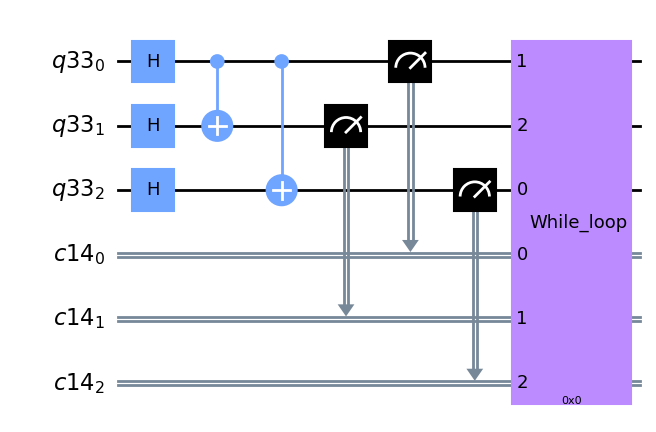

In [46]:
qr, cr = QuantumRegister(3), ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.cx(0, [1, 2])
qc.measure(qr, cr)
with qc.while_loop((cr, 0)):
    qc.reset(qr)
    qc.cx(0, [1, 2])
    qc.measure(qr, cr)
qc.draw()

In [73]:
print(f'circuit depth = {qc.depth()}')
print(f'dag depth = {circuit_to_dag(qc).depth(recurse=True)}')

circuit depth = 1
dag depth = 6


On DAGCircuit depth/size is:
- for: treated as unrolled with known length iterators
- if-else: greater of two clauses
- while: treated as if single iteration

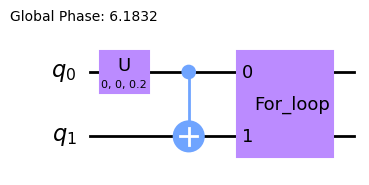

In [64]:
qc = QuantumCircuit(2)
qc.rz(0.2, 0)
qc.cx(0, 1)
with qc.for_loop((range(3))):
    qc.rx(0.3, 1)
    qc.rx(0.2, 1)
    qc.cx(0, 1)
    qc.cx(0, 1)
cqc = transpile(qc, basis_gates=["u", "cx", "for_loop"])
cqc.draw()

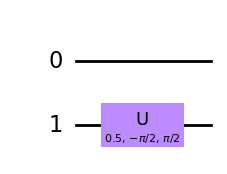

In [71]:
cqc.data[2].operation.params[2].draw()

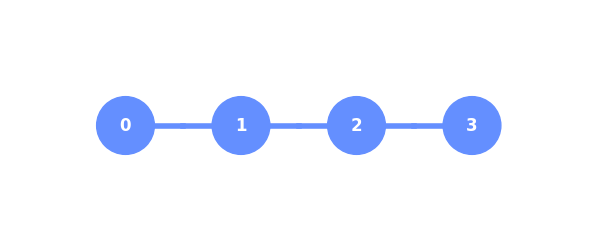

In [93]:
cmap = CouplingMap.from_line(4)
plot_coupling_map(4, [(0, i) for i in range(4)], list(cmap.get_edges()))

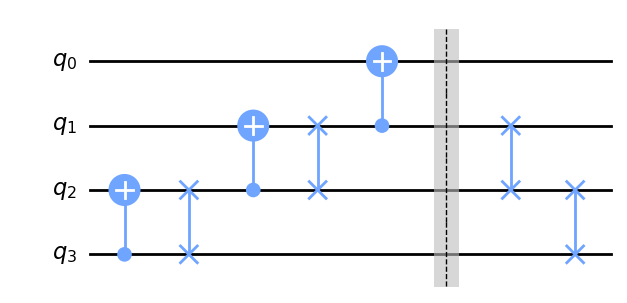

In [94]:
qc = QuantumCircuit(4)
with qc.for_loop(range(2)):
    qc.cx(0, [1, 2, 3])
    qc.barrier()
cqc = transpile(qc, basis_gates=["u", "cx", "swap", "for_loop"], coupling_map=cmap)
cqc.data[0].operation.params[2].draw()

Control Flow routing considerations
- if only, for, while: swap to starting layout
- if-else: swap to final layout of shortest depth clause